<a href="https://colab.research.google.com/github/tommyn099/python/blob/main/Dataset_Group_Focus_Project_Team_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Transaction Data 

# Case Study:								
								
This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included.								
								
Due to the number of tables and the overall complexity of The Complete Journey, it is suggested that this database be used in more advanced classroom settings. Further, The Complete Journey would be ideal for academic research as it should enable one to study the effects of direct marketing to customers.								
								
The following are examples of questions that could be submitted to students or considered for academic research:								
How many customers are spending more over time? Less over time? Describe these customers.								

1. Of those customers who are spending more over time, which categories are growing at a faster rate?								
2. Of those customers who are spending less over time, with which categories are they becoming less engaged?								
3. Which demographic factors (e.g. household size, presence of children, income) appear to affect customer spend? -Engagement with certain categories?								
4. Is there evidence to suggest that direct marketing improves overall engagement?								
5. What kind of aspects that have effect for the customer to reedem voucer(s)? (could be by demografic, total basket, price of redeemed, category of item, etc)								
<!-- 6. How about avarenge week duration of the household doing purchase? (to defince churn rate threshold)								 -->

##* STEPS*
1. Removing Irrelevant Values
2. Handling Missing Values
3. Removing Duplicate Values
4. Removing Outliers
5. Converting Data Types

# Import Library

In [ ]:
import numpy as np #numerical
import pandas as pd # Excel-nya Python
import matplotlib.pyplot as plt # Bikin grafik 
import seaborn as sns # Bikin grafik
from datetime import datetime  # manipulasi waktu
from datetime import timedelta # manipulasi waktu
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Tabel Campaign_desc

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1DnnbfP4QLDtZpBdCDpXzMh6H-2YGdQoRjpd96ZMHyj0/edit#gid=2121851045'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_campaign_desc = pd.read_csv(sheet_url_trf)
df_campaign_desc

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684
5,TypeB,21,624,656
6,TypeB,22,624,656
7,TypeA,18,587,642
8,TypeB,19,603,635
9,TypeB,17,575,607


In [ ]:
df_campaign_desc['day_difference']=df_campaign_desc['END_DAY'] -df_campaign_desc['START_DAY']

In [ ]:
desc_day = df_campaign_desc['day_difference'].groupby(df_campaign_desc['DESCRIPTION'])
desc_day.mean()

DESCRIPTION
TypeA    47.200000
TypeB    37.631579
TypeC    74.500000
Name: day_difference, dtype: float64

In [ ]:
df_campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DESCRIPTION     30 non-null     object
 1   CAMPAIGN        30 non-null     int64 
 2   START_DAY       30 non-null     int64 
 3   END_DAY         30 non-null     int64 
 4   day_difference  30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [ ]:
df_campaign_desc['CAMPAIGN'] = df_campaign_desc['CAMPAIGN'].astype(str)
df_campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DESCRIPTION     30 non-null     object
 1   CAMPAIGN        30 non-null     object
 2   START_DAY       30 non-null     int64 
 3   END_DAY         30 non-null     int64 
 4   day_difference  30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [ ]:
desc_camp = df_campaign_desc['CAMPAIGN'].groupby(df_campaign_desc['DESCRIPTION'])
desc_camp.count()

DESCRIPTION
TypeA     5
TypeB    19
TypeC     6
Name: CAMPAIGN, dtype: int64

# Tabel Campaign_table

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1ynKNzHAClQ9FqQl2uZ--_MmerUhClPNXkk1atrffQgo/edit#gid=361451482'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_campaign_table = pd.read_csv(sheet_url_trf)
df_campaign_table

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26
...,...,...,...
7203,TypeC,1803,15
7204,TypeC,1082,15
7205,TypeC,942,15
7206,TypeC,855,15


In [ ]:
df_campaign_table.isna().sum()

DESCRIPTION      0
household_key    0
CAMPAIGN         0
dtype: int64

In [ ]:
df_campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


In [ ]:
ct = ['DESCRIPTION','household_key', 'CAMPAIGN']
df_campaign_table = df_campaign_table[ct].astype(str)
df_campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   object
 2   CAMPAIGN       7208 non-null   object
dtypes: object(3)
memory usage: 169.1+ KB


In [ ]:
desc_hk = df_campaign_table['household_key'].groupby(df_campaign_table['DESCRIPTION'])
desc_hk.count()

DESCRIPTION
TypeA    3979
TypeB    2655
TypeC     574
Name: household_key, dtype: int64

In [ ]:
camp_hk = df_campaign_table['household_key'].groupby(df_campaign_table['CAMPAIGN']) 
camp_hk.count()

CAMPAIGN
1       13
10     123
11     214
12     170
13    1077
14     224
15      17
16     188
17     202
18    1133
19     130
2       48
20     244
21      65
22     276
23     183
24     100
25     187
26     332
27      12
28      17
29     118
3       12
30     361
4       81
5      166
6       65
7      198
8     1076
9      176
Name: household_key, dtype: int64

### Merge table campaign

In [ ]:
campaign = df_campaign_desc.merge(df_campaign_table,how='inner',on=['CAMPAIGN','DESCRIPTION'])
campaign

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,day_difference,household_key
0,TypeB,24,659,719,60,31
1,TypeB,24,659,719,60,149
2,TypeB,24,659,719,60,332
3,TypeB,24,659,719,60,371
4,TypeB,24,659,719,60,518
...,...,...,...,...,...,...
7203,TypeA,26,224,264,40,149
7204,TypeA,26,224,264,40,68
7205,TypeA,26,224,264,40,39
7206,TypeA,26,224,264,40,32


# Tabel Coupon

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1ojYWrzIMt7oxL9a0FjRsEgMP0sknLgyfcTpScb60W94/edit#gid=455470871'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_coupon = pd.read_csv(sheet_url_trf)
df_coupon

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25
...,...,...,...
124543,10000085478,13038802,18
124544,10000085479,13039368,18
124545,10000085478,13039553,18
124546,10000085479,13776332,18


In [ ]:
df_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


In [ ]:
c = ['COUPON_UPC','PRODUCT_ID','CAMPAIGN']
df_coupon[c] = df_coupon[c].astype(str)
df_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   COUPON_UPC  124548 non-null  object
 1   PRODUCT_ID  124548 non-null  object
 2   CAMPAIGN    124548 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


In [ ]:
camp_co = df_coupon['COUPON_UPC'].groupby(df_coupon['CAMPAIGN']) 
camp_co.count()

CAMPAIGN
1       383
10      393
11      278
12      620
13    38248
14     1062
15       55
16     1025
17      767
18    37589
19      375
2       301
20      837
21      242
22     1917
23      767
24     3774
25      826
26     3744
27     4322
28      535
29      691
3       740
30     4106
4       200
5       443
6        18
7       259
8     19206
9       825
Name: COUPON_UPC, dtype: int64

In [ ]:
pro_cam = df_coupon['PRODUCT_ID'].groupby(df_coupon['CAMPAIGN']) 
pro_cam.count()

CAMPAIGN
1       383
10      393
11      278
12      620
13    38248
14     1062
15       55
16     1025
17      767
18    37589
19      375
2       301
20      837
21      242
22     1917
23      767
24     3774
25      826
26     3744
27     4322
28      535
29      691
3       740
30     4106
4       200
5       443
6        18
7       259
8     19206
9       825
Name: PRODUCT_ID, dtype: int64

# Tabel Coupon_redempt

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1muRihPAw0JdBK-EJQkFBHEmBBZR2tA8m--yNl2cdGm0/edit#gid=803793313'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_coupon_redempt = pd.read_csv(sheet_url_trf)
df_coupon_redempt

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18
...,...,...,...,...
2313,2496,592,54900050076,18
2314,2496,610,55100000013,18
2315,2500,449,53663200076,8
2316,2500,449,54300031076,8


In [ ]:
df_coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


In [ ]:
cr = ['household_key','COUPON_UPC','CAMPAIGN']
df_coupon_redempt[cr] = df_coupon_redempt[cr].astype(str)
df_coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   household_key  2318 non-null   object
 1   DAY            2318 non-null   int64 
 2   COUPON_UPC     2318 non-null   object
 3   CAMPAIGN       2318 non-null   object
dtypes: int64(1), object(3)
memory usage: 72.6+ KB


In [ ]:
camp_re = df_coupon_redempt['COUPON_UPC'].groupby(df_coupon_redempt['CAMPAIGN']) 
camp_re.count()

CAMPAIGN
1       1
10     15
11      8
12     26
13    629
14     34
15      2
16     43
17     45
18    653
19     29
2       5
20     33
21      5
22     47
23     60
24     10
25     61
26     73
27      1
28      1
29     24
3       2
30     64
4      11
5      13
6       1
7       7
8     372
9      43
Name: COUPON_UPC, dtype: int64

In [ ]:
cr_day = df_coupon_redempt['DAY'].groupby(df_coupon_redempt['CAMPAIGN']) 
cr_day.mean()

CAMPAIGN
1     375.000000
10    475.400000
11    496.250000
12    487.769231
13    521.689984
14    569.382353
15    565.000000
16    572.395349
17    592.377778
18    609.231240
19    618.586207
2     361.000000
20    645.575758
21    645.800000
22    639.638298
23    664.033333
24    682.000000
25    675.786885
26    240.589041
27    283.000000
28    312.000000
29    302.458333
3     364.500000
30    341.531250
4     379.090909
5     399.538462
6     396.000000
7     418.857143
8     430.341398
9     453.767442
Name: DAY, dtype: float64

In [ ]:
cr_hk= df_coupon_redempt['COUPON_UPC'].groupby(df_coupon_redempt['household_key']) 
cr_hk.count()

household_key
1       5
1000    4
1005    5
101     5
1011    3
       ..
983     2
988     4
99      4
993     6
998     1
Name: COUPON_UPC, Length: 434, dtype: int64

### Merge Table coupon

In [ ]:
coupon = df_coupon.merge(df_coupon_redempt,how='inner',on=['CAMPAIGN','COUPON_UPC'])
coupon

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,household_key,DAY
0,10000089064,27754,9,321,446
1,10000089064,27754,9,1773,439
2,10000089064,243186,9,321,446
3,10000089064,243186,9,1773,439
4,10000089064,872316,9,321,446
...,...,...,...,...,...
2198357,10000089283,1073718,18,2496,592
2198358,10000089283,2194375,18,2496,592
2198359,10000089283,1095926,18,2496,592
2198360,10000089283,1056267,18,2496,592


In [ ]:
coupon.isnull().sum()

COUPON_UPC       0
PRODUCT_ID       0
CAMPAIGN         0
household_key    0
DAY              0
dtype: int64

# Tabel Product

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1HJwQfGk-tLUl6JHm6_jLYPHPd6v0hoXrVTwMfs5ZtAo/edit#gid=1597330492'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_product = pd.read_csv(sheet_url_trf)
df_product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,NaN
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,NaN
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,NaN
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,NaN
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,NaN
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,NaN


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92338 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92338 non-null  object
 5   SUB_COMMODITY_DESC    92338 non-null  object
 6   CURR_SIZE_OF_PRODUCT  61746 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


## Convert Data Type

In [ ]:
p = ['PRODUCT_ID','MANUFACTURER']
df_product[p] = df_product[p].astype(str)
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  object
 1   MANUFACTURER          92353 non-null  object
 2   DEPARTMENT            92338 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92338 non-null  object
 5   SUB_COMMODITY_DESC    92338 non-null  object
 6   CURR_SIZE_OF_PRODUCT  61746 non-null  object
dtypes: object(7)
memory usage: 4.9+ MB


## Drop Column CURR_SIZE_OF_PRODUCT

In [ ]:
df_product.drop(labels='CURR_SIZE_OF_PRODUCT', axis=1, inplace=True)
df_product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES
...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS


In [ ]:
pr_dp = df_product['PRODUCT_ID'].groupby(df_product['DEPARTMENT']) 
pr_dp.count()

DEPARTMENT
AUTOMOTIVE             2
CHARITABLE CONT        2
CHEF SHOPPE           14
CNTRL/STORE SUP        4
COSMETICS           3011
COUP/STR & MFG        39
DAIRY DELI             3
DELI                2354
DELI/SNACK BAR         2
DRUG GM            31529
ELECT &PLUMBING        1
FLORAL               938
FROZEN GROCERY        23
GARDEN CENTER        128
GM MERCH EXP           3
GRO BAKERY             2
GROCERY            39021
HBC                    1
HOUSEWARES             1
KIOSK-GAS             16
MEAT                2544
MEAT-PCKGD          2427
MEAT-WHSE              1
MISC SALES TRAN       88
MISC. TRANS.         490
NUTRITION           2914
PASTRY              2149
PHARMACY SUPPLY        1
PHOTO                  2
PORK                   1
POSTAL CENTER          3
PROD-WHS SALES         2
PRODUCE             3118
RESTAURANT           102
RX                     9
SALAD BAR             48
SEAFOOD              369
SEAFOOD-PCKGD        563
SPIRITS              377
TOYS          

In [ ]:
df_product.loc[df_product['DEPARTMENT'] == 'MEAT', 'DEPARTMENT'] = 'MEAT COUNTERS'
df_product.loc[df_product['DEPARTMENT'] == 'MEAT-PCKGD', 'DEPARTMENT'] = 'MEAT COUNTERS'
df_product.loc[df_product['DEPARTMENT'] == 'MEAT-WHSE', 'DEPARTMENT'] = 'MEAT COUNTERS'
df_product.loc[df_product['DEPARTMENT'] == 'PORK', 'DEPARTMENT'] = 'MEAT COUNTERS'

df_product.loc[df_product['DEPARTMENT'] == 'SEAFOOD', 'DEPARTMENT'] = 'SEAFOOD COUNTERS'
df_product.loc[df_product['DEPARTMENT'] == 'SEAFOOD-PCKGD', 'DEPARTMENT'] = 'SEAFOOD COUNTERS'

df_product.loc[df_product['DEPARTMENT'] == 'FROZEN GROCERY', 'DEPARTMENT'] = 'GROCERY'
df_product.loc[df_product['DEPARTMENT'] == 'PHARMACY SUPPLY', 'DEPARTMENT'] = 'DRUG GM'

df_product.loc[df_product['DEPARTMENT'] == 'DAIRY DELI', 'DEPARTMENT'] = 'SNACK COUNTERS'
df_product.loc[df_product['DEPARTMENT'] == 'DELI', 'DEPARTMENT'] = 'SNACK COUNTERS'
df_product.loc[df_product['DEPARTMENT'] == 'DELI/SNACK BAR', 'DEPARTMENT'] = 'SNACK COUNTERS'

df_product.loc[df_product['DEPARTMENT'] == 'GRO BAKERY', 'DEPARTMENT'] = 'BAKERY AND PASTRY'
df_product.loc[df_product['DEPARTMENT'] == 'PASTRY', 'DEPARTMENT'] = 'BAKERY AND PASTRY'

df_product.loc[df_product['DEPARTMENT'] == 'AUTOMOTIVE', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'CHARITABLE CONT', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'CNTRL/STORE SUP', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'COUP/STR & MFG', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'ELECT &PLUMBING', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'GM MERCH EXP', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'HBC', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'HOUSEWARES', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'KIOSK-GAS', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'MISC SALES TRAN', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'MISC. TRANS.', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'PHOTO', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'POSTAL CENTERS', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'RX', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'TOYS', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'TRAVEL & LEISUR', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'VIDEO', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'VIDEO RENTAL', 'DEPARTMENT'] = 'OTHERS'
df_product.loc[df_product['DEPARTMENT'] == 'POSTAL CENTER', 'DEPARTMENT'] = 'OTHERS'

df_product.loc[df_product['DEPARTMENT'] == 'PROD-WHS SALES', 'DEPARTMENT'] = 'PRODUCE'
df_product.loc[df_product['DEPARTMENT'] == 'FLORAL', 'DEPARTMENT'] = 'FLORAL & GARDEN'
df_product.loc[df_product['DEPARTMENT'] == 'GARDEN CENTER', 'DEPARTMENT'] = 'FLORAL & GARDEN'

df_product.loc[df_product['DEPARTMENT'] == 'SALAD BAR', 'DEPARTMENT'] = 'SNACK COUNTERS'
df_product.loc[df_product['DEPARTMENT'] == 'CHEF SHOPPE', 'DEPARTMENT'] = 'RESTAURANT'

# for pro in 'DEPARTMENT':
#   print('Value counts on',pro,'collumn:')
#   print(df_product[pro].value_counts())
#   # print('\n')
df_product['DEPARTMENT'].value_counts()

GROCERY              39044
DRUG GM              31530
MEAT COUNTERS         4973
PRODUCE               3120
COSMETICS             3011
NUTRITION             2914
SNACK COUNTERS        2407
BAKERY AND PASTRY     2151
FLORAL & GARDEN       1066
SEAFOOD COUNTERS       932
OTHERS                 697
SPIRITS                377
RESTAURANT             116
Name: DEPARTMENT, dtype: int64

## Drop Row with Missing Value

In [ ]:
df_product.dropna(axis=0,inplace=True)
df_product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,2,OTHERS,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,69,BAKERY AND PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES
...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS


In [ ]:
product = df_product.copy()
product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED
1,26081,2,OTHERS,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION
2,26093,69,BAKERY AND PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES
...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS


# Tabel Demographic

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1eoItetp1RixhRSDgH99FAQWhhLnN70-tBPN97uykEx4/edit#gid=1710097754'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_demographic = pd.read_csv(sheet_url_trf)
df_demographic

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16
...,...,...,...,...,...,...,...,...
796,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494
797,45-54,A,75-99K,Homeowner,Unknown,3,1,2496
798,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497
799,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498


In [ ]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


## Convert Data Type

In [ ]:
df_demographic['household_key'] = df_demographic['household_key'].astype(str)
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    object
dtypes: object(8)
memory usage: 50.2+ KB


In [ ]:
def f(comp, kidcat, hhd):
      if 'No Kids' in comp : return '0'
      elif  'Single' in comp : return '0'
      elif hhd == '2' and kidcat == '1' : return kidcat
      elif hhd == '2' and kidcat == '1' : return kidcat
      elif hhd == '2' and kidcat == 'None/Unknown' : return '0'
      elif hhd == '3' and kidcat == '1' : return '1'  
      elif hhd == '1' : return '0' 
      else : return kidcat

df_demographic['KID_NUM'] = df_demographic.apply(lambda x: f(x['HH_COMP_DESC'], x['KID_CATEGORY_DESC'],x['HOUSEHOLD_SIZE_DESC']), axis=1)
df_demographic['KID_NUM'].value_counts()

0     558
1     114
3+     69
2      60
Name: KID_NUM, dtype: int64

In [ ]:
    def f(comp, kid, hhd):
      if '2 Adults' in comp : return '2'
      elif  'Single' in comp : return '1'
      elif  '1 Adult' in comp : return '1'
      elif comp ==  'Unknown' :
        if hhd == '3' : return '2'
        elif (hhd == '2') & (kid == '1') : return '1'
        elif hhd == '2' : return '2'
        elif hhd == '1' : return '1'
        elif hhd == '5+' : return '2'

    df_demographic['ADULT_NUM'] = df_demographic.apply(lambda x: f(x['HH_COMP_DESC'], x['KID_NUM'], x['HOUSEHOLD_SIZE_DESC']), axis=1)
    df_demographic['ADULT_NUM'].value_counts()

2    453
1    348
Name: ADULT_NUM, dtype: int64

In [ ]:
df_demographic.loc[df_demographic['INCOME_DESC'] == 'Under 15K', 'INCOME_DESC'] = '< 50K'
df_demographic.loc[df_demographic['INCOME_DESC'] == '15-24K', 'INCOME_DESC'] = '< 50K'
df_demographic.loc[df_demographic['INCOME_DESC'] == '25-34K', 'INCOME_DESC'] = '< 50K'
df_demographic.loc[df_demographic['INCOME_DESC'] == '35-49K', 'INCOME_DESC'] = '< 50K'

df_demographic.loc[df_demographic['INCOME_DESC'] == '50-74K', 'INCOME_DESC'] = '50-99K'
df_demographic.loc[df_demographic['INCOME_DESC'] == '75-99K', 'INCOME_DESC'] = '50-99K'

df_demographic.loc[df_demographic['INCOME_DESC'] == '100-124K', 'INCOME_DESC'] = '100-149K'
df_demographic.loc[df_demographic['INCOME_DESC'] == '125-149K', 'INCOME_DESC'] = '100-149K'

df_demographic.loc[df_demographic['INCOME_DESC'] == '150-174K', 'INCOME_DESC'] = '150-199K'
df_demographic.loc[df_demographic['INCOME_DESC'] == '175-199K', 'INCOME_DESC'] = '150-199K'

df_demographic.loc[df_demographic['INCOME_DESC'] == '200-249K', 'INCOME_DESC'] = '> 200K'
df_demographic.loc[df_demographic['INCOME_DESC'] == '250K+', 'INCOME_DESC'] = '> 200K'

df_demographic['INCOME_DESC'].value_counts()

< 50K       384
50-99K      288
100-149K     72
150-199K     41
> 200K       16
Name: INCOME_DESC, dtype: int64

In [ ]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    object
 8   KID_NUM              801 non-null    object
 9   ADULT_NUM            801 non-null    object
dtypes: object(10)
memory usage: 62.7+ KB


##Delete unnecessary column
1. MARITAL_STATUS_CODE : too many unknown value, and marital status considered not really affect product
2. KID_CATEGORY_DESC : have been cleaned into KID_NUM table with no NONE/UNKNOWN value

In [ ]:
df_demographic.drop(['MARITAL_STATUS_CODE','KID_CATEGORY_DESC'],axis=1, inplace=True)
df_demographic

,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key,KID_NUM,ADULT_NUM
0,65+,< 50K,Homeowner,2 Adults No Kids,2,1,0,2
1,45-54,50-99K,Homeowner,2 Adults No Kids,2,7,0,2
2,25-34,< 50K,Unknown,2 Adults Kids,3,8,1,2
3,25-34,50-99K,Homeowner,2 Adults Kids,4,13,2,2
4,45-54,50-99K,Homeowner,Single Female,1,16,0,1
...,...,...,...,...,...,...,...,...
796,35-44,50-99K,Homeowner,2 Adults No Kids,2,2494,0,2
797,45-54,50-99K,Homeowner,Unknown,3,2496,1,2
798,45-54,< 50K,Unknown,Single Male,1,2497,0,1
799,25-34,50-99K,Homeowner,2 Adults No Kids,2,2498,0,2


In [ ]:
de_hk = df_demographic['household_key'].groupby(df_demographic['INCOME_DESC']) 
de_hk.count().sort_values(ascending=False).reset_index()

,INCOME_DESC,household_key
0,< 50K,384
1,50-99K,288
2,100-149K,72
3,150-199K,41
4,> 200K,16


In [ ]:
de_age = df_demographic['household_key'].groupby(df_demographic['AGE_DESC']) 
de_age.count()

AGE_DESC
19-24     46
25-34    142
35-44    194
45-54    288
55-64     59
65+       72
Name: household_key, dtype: int64

In [ ]:
de_hhd = df_demographic['household_key'].groupby(df_demographic['HH_COMP_DESC']) 
de_hhd.count()

HH_COMP_DESC
1 Adult Kids         47
2 Adults Kids       187
2 Adults No Kids    255
Single Female       144
Single Male          95
Unknown              73
Name: household_key, dtype: int64

In [ ]:
df_demographic['HOMEOWNER_DESC'].unique()

array(['Homeowner', 'Unknown', 'Renter', 'Probable Renter',
       'Probable Owner'], dtype=object)

In [ ]:
df_demographic.loc[df_demographic['HOMEOWNER_DESC'] == 'Probable Renter', 'HOMEOWNER_DESC'] = 'Renter'
df_demographic.loc[df_demographic['HOMEOWNER_DESC'] == 'Probable Owner', 'HOMEOWNER_DESC'] = 'Homeowner'
df_demographic['HOMEOWNER_DESC'].value_counts()

Homeowner    515
Unknown      233
Renter        53
Name: HOMEOWNER_DESC, dtype: int64

In [ ]:
de_hk = df_demographic['household_key'].groupby(df_demographic['HOUSEHOLD_SIZE_DESC']) 
de_hk.count()

HOUSEHOLD_SIZE_DESC
1     255
2     318
3     109
4      53
5+     66
Name: household_key, dtype: int64

In [ ]:
demographic = df_demographic.copy()
demographic

,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,household_key,KID_NUM,ADULT_NUM
0,65+,< 50K,Homeowner,2 Adults No Kids,2,1,0,2
1,45-54,50-99K,Homeowner,2 Adults No Kids,2,7,0,2
2,25-34,< 50K,Unknown,2 Adults Kids,3,8,1,2
3,25-34,50-99K,Homeowner,2 Adults Kids,4,13,2,2
4,45-54,50-99K,Homeowner,Single Female,1,16,0,1
...,...,...,...,...,...,...,...,...
796,35-44,50-99K,Homeowner,2 Adults No Kids,2,2494,0,2
797,45-54,50-99K,Homeowner,Unknown,3,2496,1,2
798,45-54,< 50K,Unknown,Single Male,1,2497,0,1
799,25-34,50-99K,Homeowner,2 Adults No Kids,2,2498,0,2


# Tabel Transaction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_transaction = pd.read_csv('/content/drive/MyDrive/Dataset_GFP_Grup_R/transaction_data.csv')
df_transaction

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0


In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


## Create New Column

Day Name

In [ ]:
def f(day, week):
      if day - (week-1)*7 == -1 : return 'Monday'
      elif  day - (week-1)*7 == 0 : return 'Tuesday'
      elif day - (week-1)*7 == 1 : return 'Wednesday'
      elif day - (week-1)*7 == 2 : return 'Thursday'
      elif day - (week-1)*7 == 3 : return 'Friday'
      elif day - (week-1)*7 == 4 : return 'Saturday'
      elif day - (week-1)*7 == 5 : return 'Sunday'
df_transaction['DAY_NAME'] = df_transaction.apply(lambda x: f(x['DAY'], x['WEEK_NO']), axis=1)
df_transaction

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DAY_NAME
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,Wednesday
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,Wednesday
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,Wednesday
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,Wednesday
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,Saturday
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,Saturday
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,Saturday
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,Saturday


In [ ]:
df_transaction['DAY_NAME'].value_counts().sort_values(ascending=False).reset_index()

,index,DAY_NAME
0,Sunday,463204
1,Saturday,435936
2,Monday,362370
3,Friday,351683
4,Tuesday,332080
5,Wednesday,327880
6,Thursday,322579


Year and Quartal

In [ ]:
def f(day):
      if day <= 365 : return '1'
      elif  day > 365 : return '2'
df_transaction['YEAR'] = df_transaction.apply(lambda x: f(x['DAY']), axis=1)
def f(day):
      if day <= 92 : return '1'
      elif day > 92 and day <=183 : return '2'
      elif day > 183 and day <= 274 : return '3'
      elif day > 274 and day <= 365 : return '4'
      elif day > 365 and day <= 457 : return '1'
      elif day > 457 and day <= 548 : return '2'
      elif day > 548 and day <= 639 : return '3'
      elif day > 639 : return '4'
df_transaction['Q'] = df_transaction.apply(lambda x: f(x['DAY']), axis=1)
df_transaction

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DAY_NAME,YEAR,Q
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,Wednesday,1,1
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,Wednesday,1,1
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,Wednesday,1,1
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,Wednesday,1,1
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,Wednesday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,Saturday,2,4
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,Saturday,2,4
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,Saturday,2,4
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,Saturday,2,4


In [ ]:
df_transaction[df_transaction['DAY']==6]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,DAY_NAME,YEAR,Q
1755,1096,27031378941,6,913785,1,0.99,321,-1.00,40,2,0.0,0.0,Monday,1,1
1756,1096,27031378941,6,1082185,1,0.48,321,0.00,40,2,0.0,0.0,Monday,1,1
1757,1096,27031378941,6,1106523,1,2.32,321,0.00,40,2,0.0,0.0,Monday,1,1
1758,1096,27031378941,6,6533236,1,2.33,321,-1.66,40,2,0.0,0.0,Monday,1,1
1759,1096,27031378941,6,6773232,1,2.29,321,0.00,40,2,0.0,0.0,Monday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,480,27057806466,6,6979758,1,1.39,433,0.00,1616,2,0.0,0.0,Monday,1,1
2631,480,27057806466,6,7466767,1,2.50,433,-0.19,1616,2,0.0,0.0,Monday,1,1
2632,480,27057806466,6,9297151,1,2.99,433,0.00,1616,2,0.0,0.0,Monday,1,1
2682,650,27058841281,6,1499569,1,1.00,563,-0.19,2003,2,0.0,0.0,Monday,1,1


## Check Missing Values

In [ ]:
df_transaction.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
DAY_NAME             0
YEAR                 0
Q                    0
dtype: int64

## Convert Column have Similar Data

In [ ]:
df_transaction['COUPON'] = df_transaction['COUPON_DISC']+df_transaction['COUPON_MATCH_DISC']
df_transaction.drop(['COUPON_DISC','COUPON_MATCH_DISC'], axis=1, inplace=True)
df_transaction

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,DAY_NAME,YEAR,Q,COUPON
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,Wednesday,1,1,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,Wednesday,1,1,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,Wednesday,1,1,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,Wednesday,1,1,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,Wednesday,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,Saturday,2,4,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,Saturday,2,4,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,Saturday,2,4,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,Saturday,2,4,0.0


In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            int64  
 3   PRODUCT_ID     int64  
 4   QUANTITY       int64  
 5   SALES_VALUE    float64
 6   STORE_ID       int64  
 7   RETAIL_DISC    float64
 8   TRANS_TIME     int64  
 9   WEEK_NO        int64  
 10  DAY_NAME       object 
 11  YEAR           object 
 12  Q              object 
 13  COUPON         float64
dtypes: float64(3), int64(8), object(3)
memory usage: 277.3+ MB


## Convert Data Type

In [ ]:
t = ['household_key','BASKET_ID','PRODUCT_ID','STORE_ID']
df_transaction[t] = df_transaction[t].astype(str)
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  object 
 1   BASKET_ID      object 
 2   DAY            int64  
 3   PRODUCT_ID     object 
 4   QUANTITY       int64  
 5   SALES_VALUE    float64
 6   STORE_ID       object 
 7   RETAIL_DISC    float64
 8   TRANS_TIME     int64  
 9   WEEK_NO        int64  
 10  DAY_NAME       object 
 11  YEAR           object 
 12  Q              object 
 13  COUPON         float64
dtypes: float64(3), int64(4), object(7)
memory usage: 277.3+ MB


## Drop Irrelevant Data

In [ ]:
df_transaction.drop(labels='TRANS_TIME', axis=1, inplace=True)
df_transaction

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,YEAR,Q,COUPON
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1,Wednesday,1,1,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1,Wednesday,1,1,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1,Wednesday,1,1,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1,Wednesday,1,1,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1,Wednesday,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,102,Saturday,2,4,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,102,Saturday,2,4,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,102,Saturday,2,4,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,Saturday,2,4,0.0


In [ ]:
transaction = df_transaction.copy()
transaction

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,YEAR,Q,COUPON
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1,Wednesday,1,1,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1,Wednesday,1,1,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1,Wednesday,1,1,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1,Wednesday,1,1,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1,Wednesday,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,102,Saturday,2,4,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,102,Saturday,2,4,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,102,Saturday,2,4,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,Saturday,2,4,0.0


# Merge All Table

TABEL YANG AKAN DIGUNAKAN :
1. merge 3 = untuk analisis sales terhadap produk dan campaign
2. merge 4 = untuk analisis sales secara keseluruhan (produk dan demografi) campaign

In [ ]:
merge1 = campaign.merge(coupon,how='inner',on=['CAMPAIGN','household_key'])
merge2 = merge1.merge(product,how='inner',on='PRODUCT_ID')
merge3 = transaction.merge(merge2,how='inner',on=['household_key','PRODUCT_ID','DAY'])
merge3

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,CAMPAIGN,START_DAY,END_DAY,day_difference,COUPON_UPC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2280,30202600975,225,1139915,1,3.24,438,-0.30,33,Wednesday,...,26,224,264,40,57008510075,1423,GROCERY,National,FROZEN PIZZA,SNACKS/APPETIZERS
1,2240,30217246237,226,6039659,1,2.69,410,0.00,33,Thursday,...,26,224,264,40,53600000001,751,DRUG GM,National,BABY HBC,BABY WIPES
2,788,30229220221,227,895680,1,3.34,360,-2.05,33,Friday,...,26,224,264,40,57218020076,1755,GROCERY,National,FROZEN PIZZA,PIZZA/TRADITIONAL
3,788,30229220221,227,899736,1,1.74,360,-1.75,33,Friday,...,26,224,264,40,55100055008,1251,GROCERY,National,FRZN MEAT/MEAT DINNERS,FRZN SS PREMIUM ENTREES/DNRS/T
4,788,30229220221,227,954495,1,1.74,360,-1.75,33,Friday,...,26,224,264,40,55100055008,1251,GROCERY,National,FRZN MEAT/MEAT DINNERS,FRZN SS PREMIUM ENTREES/DNRS/T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,1935,42198343969,704,1068391,1,0.50,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR
4388,1935,42198343969,704,1088308,1,0.50,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR
4389,1935,42198343969,704,15716072,2,1.00,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR
4390,1935,42198343969,704,15716098,2,1.00,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR


In [ ]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4392 entries, 0 to 4391
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   household_key       4392 non-null   object 
 1   BASKET_ID           4392 non-null   object 
 2   DAY                 4392 non-null   int64  
 3   PRODUCT_ID          4392 non-null   object 
 4   QUANTITY            4392 non-null   int64  
 5   SALES_VALUE         4392 non-null   float64
 6   STORE_ID            4392 non-null   object 
 7   RETAIL_DISC         4392 non-null   float64
 8   WEEK_NO             4392 non-null   int64  
 9   DAY_NAME            4392 non-null   object 
 10  YEAR                4392 non-null   object 
 11  Q                   4392 non-null   object 
 12  COUPON              4392 non-null   float64
 13  DESCRIPTION         4392 non-null   object 
 14  CAMPAIGN            4392 non-null   object 
 15  START_DAY           4392 non-null   int64  
 16  END_DA

###Table keseluruhan saat campaign
data lain yang dianalisis khusus yang householdnya terdaftar

In [ ]:
merge4 = merge3.merge(demographic,how='inner',on=['household_key'])
merge4

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_NUM,ADULT_NUM
0,2280,30202600975,225,1139915,1,3.24,438,-0.30,33,Wednesday,...,National,FROZEN PIZZA,SNACKS/APPETIZERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
1,2280,30627996067,241,12456474,1,2.50,438,-0.69,35,Friday,...,National,CANDY - PACKAGED,CANDY BAGS-CHOCOCLATE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
2,2280,31804141130,323,824796,1,2.99,438,-0.50,47,Wednesday,...,National,COFFEE,GROUND COFFEE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
3,2280,31804141130,323,8181177,1,5.79,438,0.00,47,Wednesday,...,National,ORAL HYGIENE PRODUCTS,MOUTHWASH RINSES AND SPRAYS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
4,2280,33095146510,413,1075214,1,6.49,438,-2.50,60,Tuesday,...,National,BATH TISSUES,TOILET TISSUE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,400,41917741301,683,894426,1,1.54,388,-0.20,98,Saturday,...,National,BAG SNACKS,PRETZELS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3530,400,41917741301,683,5568729,2,6.38,388,-0.60,98,Saturday,...,National,BAG SNACKS,TORTILLA/NACHO CHIPS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3531,400,41917741301,683,6463907,1,4.99,388,-0.49,98,Saturday,...,National,FROZEN PIZZA,PIZZA/PREMIUM,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3532,400,41917741301,683,15926944,1,2.69,388,-0.30,98,Saturday,...,National,BAG SNACKS,DIPS (NON-REFRIGERATED),35-44,150-199K,Homeowner,2 Adults Kids,3,1,2


In [ ]:
merge4['household_key'].nunique()

294

In [ ]:
merge4.isna().sum()

household_key          0
BASKET_ID              0
DAY                    0
PRODUCT_ID             0
QUANTITY               0
SALES_VALUE            0
STORE_ID               0
RETAIL_DISC            0
WEEK_NO                0
DAY_NAME               0
YEAR                   0
Q                      0
COUPON                 0
DESCRIPTION            0
CAMPAIGN               0
START_DAY              0
END_DAY                0
day_difference         0
COUPON_UPC             0
MANUFACTURER           0
DEPARTMENT             0
BRAND                  0
COMMODITY_DESC         0
SUB_COMMODITY_DESC     0
AGE_DESC               0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_NUM                0
ADULT_NUM              0
dtype: int64

### Rata-rata penjualan per minggu

In [ ]:
sal_we = merge4['SALES_VALUE'].groupby(merge4['WEEK_NO']) 
sal_we.mean()

WEEK_NO
33      2.142105
34      2.835833
35      2.790769
36      4.137778
37      3.232000
         ...    
97      7.245714
98      2.664043
99      3.528889
100    11.990000
101     1.626000
Name: SALES_VALUE, Length: 63, dtype: float64

### Rata-rata penjualan per store

In [ ]:
sal_store =  merge4['SALES_VALUE'].groupby(merge4['STORE_ID']) 
sal_store.mean()

STORE_ID
2761    1.833333
286     2.327143
292     3.304915
293     3.590625
295     3.051000
          ...   
447     3.167143
448     2.979333
450     2.756667
569     2.495000
673     2.463333
Name: SALES_VALUE, Length: 104, dtype: float64

In [ ]:
sal_cam = merge4['SALES_VALUE'].groupby(merge4['DESCRIPTION']) 
sal_cam.sum()

DESCRIPTION
TypeA    9604.98
TypeB    1514.92
TypeC     178.68
Name: SALES_VALUE, dtype: float64

#EDA PLAN
1. Sales value berdasarkan hari dan minggu
2. Coupon berdasarkan campaign dan description
3. seberapa ngaruh kupon terhadap sales value
4. seberapa besar pengaruh retail discount dan juga kupon
5. hubungan sales dan demografi
6. hubungan sales ke product
7. hubungan homeowner desc dengan kegunaan coupon
8. hubungan umur dengan product dan penjualan
9. hubungan banyaknya transaksi dengan jumlah hari
10. Bandingkan jumlah rata2 per hari di week ada diskon dan tidak
11. Ubah data 102 minggu ke data 4 kuartal
12. Analisis penjualan tahun pertama dan kedua terkait penggunaan kupon
13. Analisis penjualan berdasarkan retail diskon antara tahun pertama dan kedua
14. analisis hubungan sales value dan income user
15. Analisa hubungan produk dengan household desc (ada tidaknya anak)

pembagian:
1-5 : cindy
6-10 : dina
11-15 : tommy




1. Demografi vs product
2. Demografi vs sales

## Campaign terhadap Produk

In [ ]:
ca_pro =  merge3['CAMPAIGN'].groupby(merge3['DEPARTMENT'])
ca_pro.count()

DEPARTMENT
BAKERY AND PASTRY       5
COSMETICS              15
DRUG GM               399
FLORAL & GARDEN         6
GROCERY              2714
MEAT COUNTERS         521
NUTRITION              40
OTHERS                 10
PRODUCE               597
RESTAURANT              6
SEAFOOD COUNTERS       60
SNACK COUNTERS         19
Name: CAMPAIGN, dtype: int64

## Sales berdasarkan Days

In [ ]:
sal_day =  merge4['SALES_VALUE'].groupby(merge3['DAY_NAME']) 
sal_day.count()

DAY_NAME
Friday       522
Monday       371
Saturday     712
Sunday       649
Thursday     435
Tuesday      358
Wednesday    487
Name: SALES_VALUE, dtype: int64

## Coupon berdasarkan Campaign

In [ ]:
cou_cam = merge4.groupby(['DESCRIPTION','CAMPAIGN'])['COUPON'].agg(['count'])
cou_cam

count
DESCRIPTION CAMPAIGN       
TypeA       13         1136
            18         1272
            26           77
            30           50
            8           491
TypeB       10           10
            11            9
            12           17
            16           30
            17           38
            19           21
            2             7
            21            2
            22           63
            23           76
            24           44
            25           41
            28            1
            29           17
            4             5
            5             7
            7             3
            9            42
TypeC       14           36
            15            2
            20           28
            27            4
            3             3
            6             2

## Sales berdasarkan Week

In [ ]:
sal_week = merge3.groupby(['WEEK_NO'])['SALES_VALUE'].agg(['count'])
sal_week

,count
WEEK_NO,
33,21
34,14
35,22
36,9
37,10
...,...
97,19
98,51
99,11


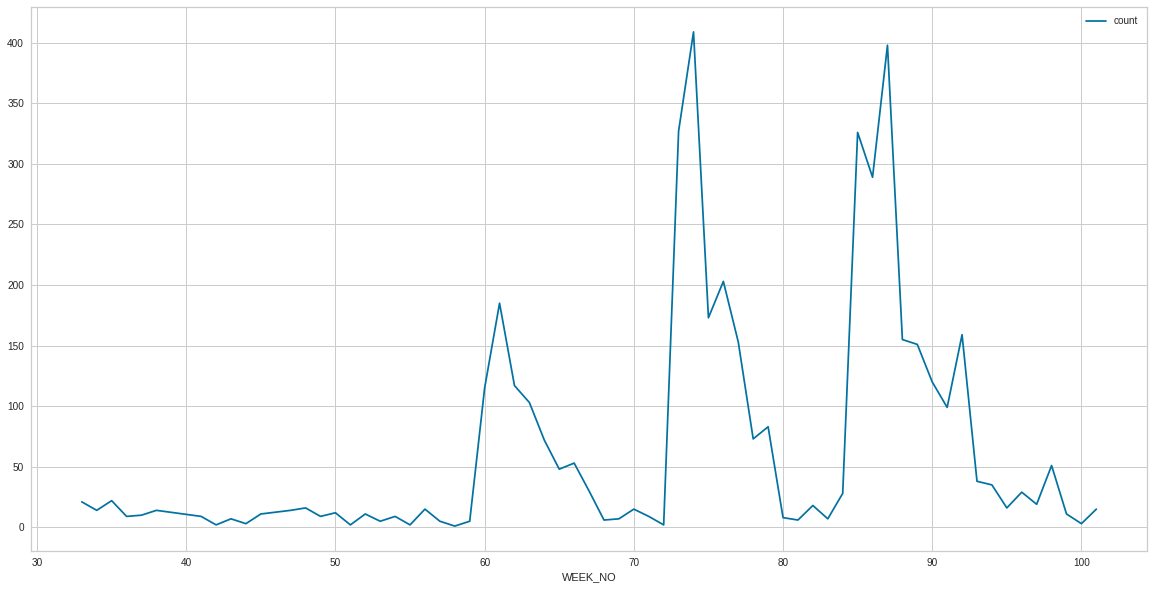

In [ ]:
pd.pivot_table(sal_week,
               index='WEEK_NO', values='count'
              ).plot(subplots=False, figsize=(20, 10))

## Pengaruh Campaign dengan Product

In [ ]:
cou_sal = merge3.groupby(['DEPARTMENT'])['CAMPAIGN'].agg(['count'])
cou_sal

,count
DEPARTMENT,
BAKERY AND PASTRY,5
COSMETICS,15
DRUG GM,399
FLORAL & GARDEN,6
GROCERY,2714
MEAT COUNTERS,521
NUTRITION,40
OTHERS,10
PRODUCE,597


## Pengaruh Retail Disc & Coupon terhadap Sales

In [ ]:
ret_cou_sal = merge3.groupby(['RETAIL_DISC','COUPON_UPC'])['SALES_VALUE'].agg(['count'])
ret_cou_sal

count
RETAIL_DISC COUPON_UPC        
-46.53      54900050076      1
-30.35      54900050076      1
-24.28      54900050076      1
-17.00      10000085496      1
-16.00      57007440087      1
...                        ...
 0.00       57231020034      2
            57457010076      1
            57800000033      1
            58768484040      6
            58870211150      1

[1651 rows x 1 columns]

In [ ]:
merge4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 3533
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   household_key        3534 non-null   object 
 1   BASKET_ID            3534 non-null   object 
 2   DAY                  3534 non-null   int64  
 3   PRODUCT_ID           3534 non-null   object 
 4   QUANTITY             3534 non-null   int64  
 5   SALES_VALUE          3534 non-null   float64
 6   STORE_ID             3534 non-null   object 
 7   RETAIL_DISC          3534 non-null   float64
 8   WEEK_NO              3534 non-null   int64  
 9   DAY_NAME             3534 non-null   object 
 10  YEAR                 3534 non-null   object 
 11  Q                    3534 non-null   object 
 12  COUPON               3534 non-null   float64
 13  DESCRIPTION          3534 non-null   object 
 14  CAMPAIGN             3534 non-null   object 
 15  START_DAY            3534 non-null   i

## Hubungan Sales dan Demographic

In [ ]:
merge4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 3533
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   household_key        3534 non-null   object 
 1   BASKET_ID            3534 non-null   object 
 2   DAY                  3534 non-null   int64  
 3   PRODUCT_ID           3534 non-null   object 
 4   QUANTITY             3534 non-null   int64  
 5   SALES_VALUE          3534 non-null   float64
 6   STORE_ID             3534 non-null   object 
 7   RETAIL_DISC          3534 non-null   float64
 8   WEEK_NO              3534 non-null   int64  
 9   DAY_NAME             3534 non-null   object 
 10  YEAR                 3534 non-null   object 
 11  Q                    3534 non-null   object 
 12  COUPON               3534 non-null   float64
 13  DESCRIPTION          3534 non-null   object 
 14  CAMPAIGN             3534 non-null   object 
 15  START_DAY            3534 non-null   i

In [ ]:
merge4.groupby(['HH_COMP_DESC'])['SALES_VALUE'].agg(['count']).sort_values(by = 'count',ascending=False)


,count
HH_COMP_DESC,
2 Adults No Kids,1187
2 Adults Kids,1033
Single Female,546
Single Male,269
Unknown,258
1 Adult Kids,241


## Hubungan Sales dengan Product

In [ ]:
sal_pro_cam = merge3.groupby(['DEPARTMENT'])['SALES_VALUE'].agg(['count','mean','sum'])
sal_pro_cam

,count,mean,sum
DEPARTMENT,,,
BAKERY AND PASTRY,5,3.624000,18.12
COSMETICS,15,4.415333,66.23
DRUG GM,399,5.355313,2136.77
FLORAL & GARDEN,6,8.485000,50.91
GROCERY,2714,2.825560,7668.57
MEAT COUNTERS,521,4.819194,2510.80
NUTRITION,40,2.999750,119.99
OTHERS,10,3.049000,30.49
PRODUCE,597,2.226566,1329.26


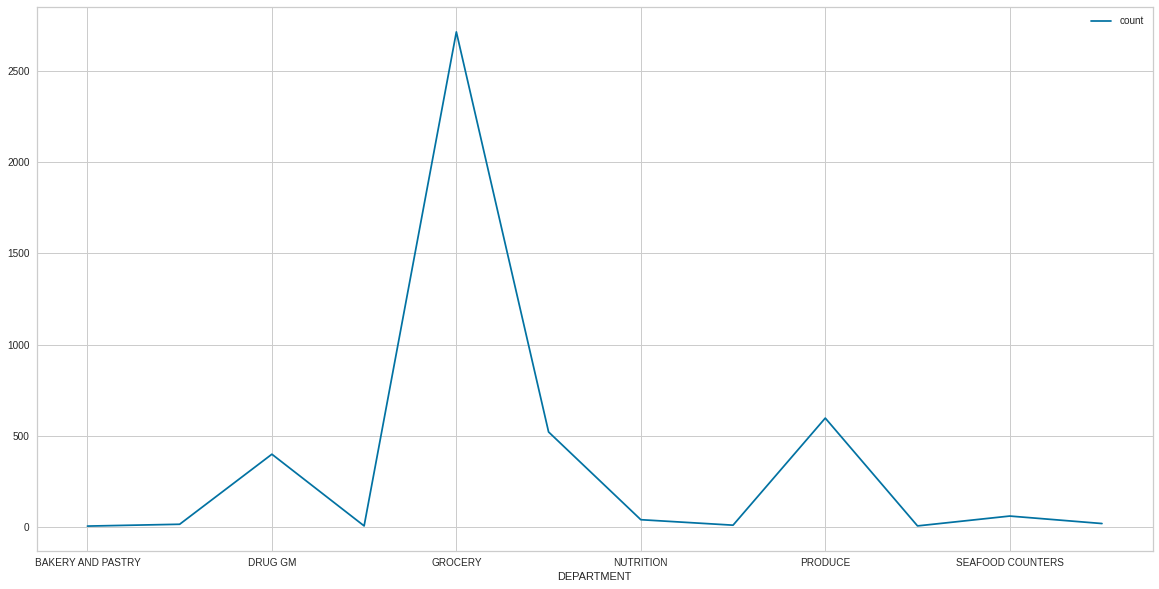

In [ ]:
pd.pivot_table(sal_pro_cam.reset_index(),
               index='DEPARTMENT', values='count'
              ).plot(subplots=False, figsize=(20, 10))

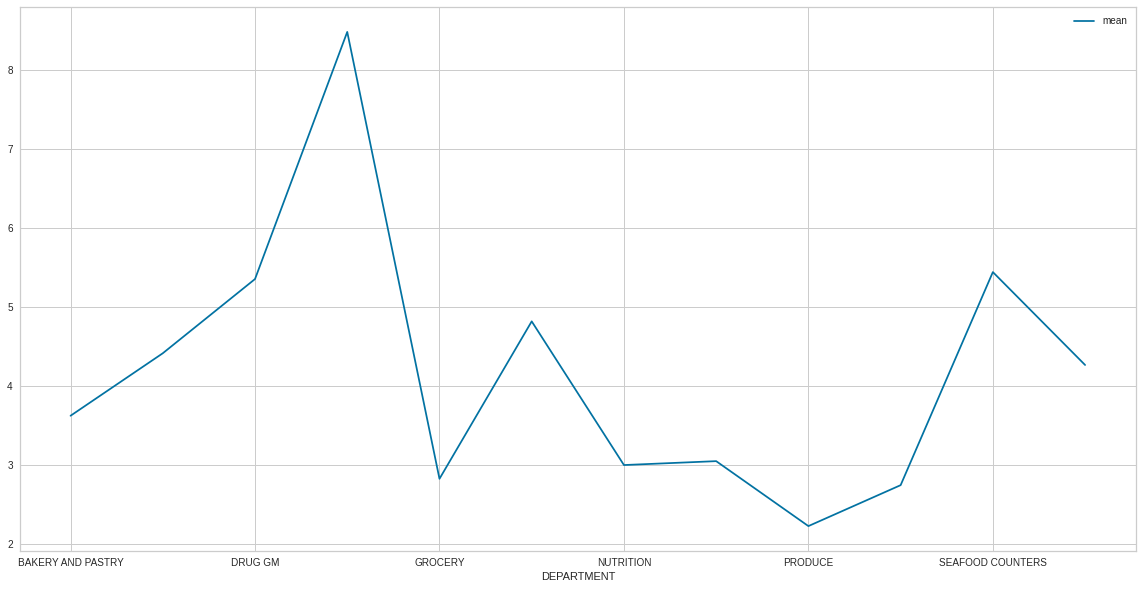

In [ ]:
pd.pivot_table(sal_pro_cam.reset_index(),
               index='DEPARTMENT', values='mean'
              ).plot(subplots=False, figsize=(20, 10))

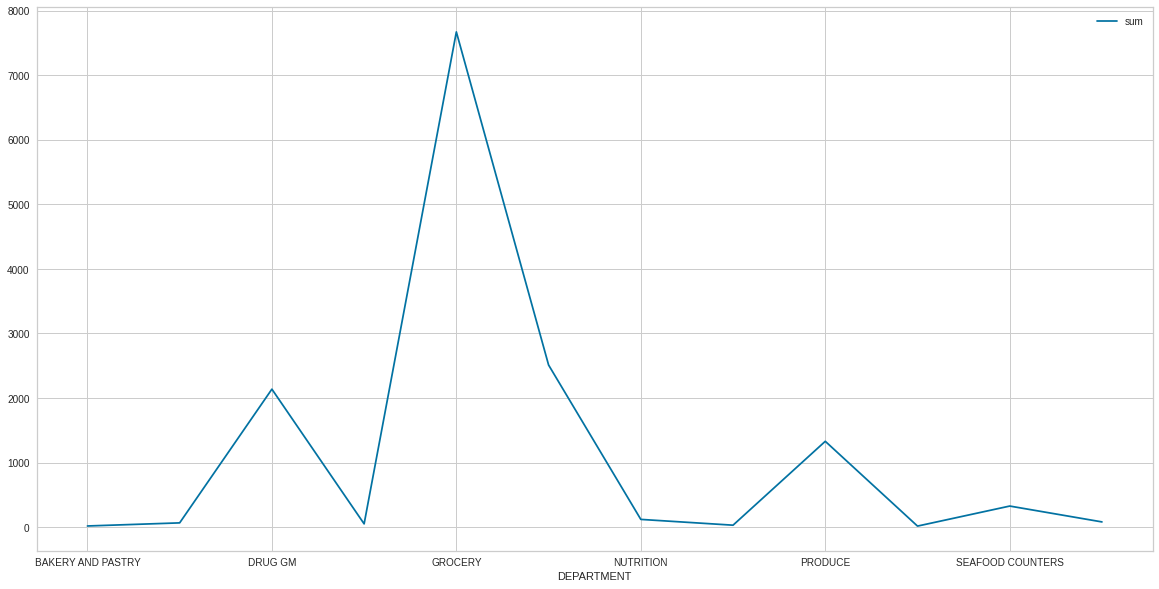

In [ ]:
pd.pivot_table(sal_pro_cam.reset_index(),
               index='DEPARTMENT', values='sum'
              ).plot(subplots=False, figsize=(20, 10))

## Hubungan antara coupon diskon dan Homeowner Desc

In [ ]:
cop = merge4.loc[(merge4['COUPON'] != 0)]
cop

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_NUM,ADULT_NUM
0,2280,30202600975,225,1139915,1,3.24,438,-0.30,33,Wednesday,...,National,FROZEN PIZZA,SNACKS/APPETIZERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
1,2280,30627996067,241,12456474,1,2.50,438,-0.69,35,Friday,...,National,CANDY - PACKAGED,CANDY BAGS-CHOCOCLATE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
2,2280,31804141130,323,824796,1,2.99,438,-0.50,47,Wednesday,...,National,COFFEE,GROUND COFFEE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
4,2280,33095146510,413,1075214,1,6.49,438,-2.50,60,Tuesday,...,National,BATH TISSUES,TOILET TISSUE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
5,2280,33920030845,466,828896,1,15.99,292,0.00,67,Saturday,...,National,DIAPERS & DISPOSABLES,BABY DIAPERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,1627,41865755264,679,1108622,1,15.29,402,-1.70,98,Tuesday,...,National,DOG FOODS,DRY DOG FOOD SUPER PREM (ONE/N,25-34,< 50K,Unknown,Single Male,1,0,1
3529,400,41917741301,683,894426,1,1.54,388,-0.20,98,Saturday,...,National,BAG SNACKS,PRETZELS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3530,400,41917741301,683,5568729,2,6.38,388,-0.60,98,Saturday,...,National,BAG SNACKS,TORTILLA/NACHO CHIPS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3531,400,41917741301,683,6463907,1,4.99,388,-0.49,98,Saturday,...,National,FROZEN PIZZA,PIZZA/PREMIUM,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2


In [ ]:
home_co = cop.groupby(['HOMEOWNER_DESC'])['COUPON'].agg(['count'])
home_co

,count
HOMEOWNER_DESC,
Homeowner,933
Renter,63
Unknown,178


In [ ]:
co_in = cop['COUPON'].groupby(cop['INCOME_DESC'])
co_in.count().reset_index()

,INCOME_DESC,COUPON
0,100-149K,98
1,150-199K,101
2,50-99K,611
3,< 50K,357
4,> 200K,7


## Hubungan antara umur dan product pembelian

In [ ]:
pro_age = merge4.groupby(['DEPARTMENT','AGE_DESC'])['SALES_VALUE'].agg(['count'])
pro_age

count
DEPARTMENT        AGE_DESC       
BAKERY AND PASTRY 25-34         1
                  35-44         1
                  45-54         1
COSMETICS         25-34         1
                  35-44         6
                  45-54         4
                  55-64         1
                  65+           1
DRUG GM           19-24         8
                  25-34        68
                  35-44        91
                  45-54       133
                  55-64        10
                  65+           7
FLORAL & GARDEN   25-34         1
                  45-54         1
                  55-64         1
GROCERY           19-24        65
                  25-34       434
                  35-44       539
                  45-54       860
                  55-64       162
                  65+         117
MEAT COUNTERS     25-34        56
                  35-44       125
                  45-54       176
                  55-64        13
                  65+           6
NUTRITION         19-24         1
                  25-34        10
                  35-44        17
                  45-54         6
                  55-64         2
                  65+           1
OTHERS            35-44         2
                  45-54         8
PRODUCE           19-24         4
                  25-34       111
                  35-44       107
                  45-54       227
                  55-64        35
                  65+          41
RESTAURANT        25-34         2
                  35-44         1
                  45-54         3
SEAFOOD COUNTERS  19-24         1
                  25-34         4
                  35-44        13
                  45-54        24
                  55-64         3
                  65+           6
SNACK COUNTERS    19-24         1
                  25-34         2
                  35-44         5
                  45-54         3
                  55-64         4
                  65+           1

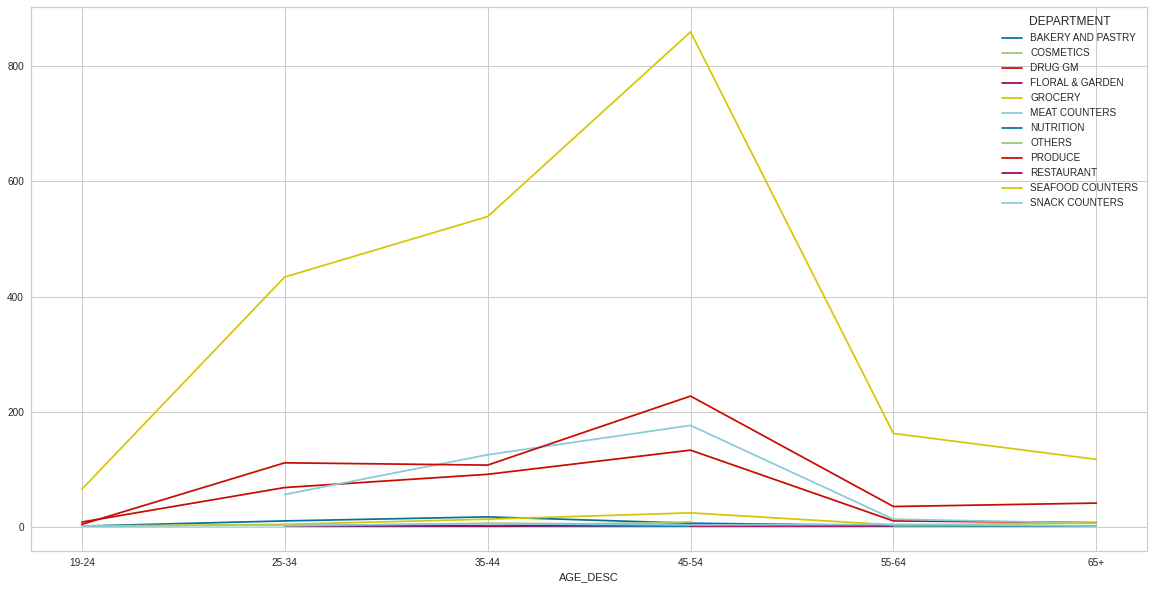

In [ ]:
pd.pivot_table(pro_age.reset_index(),
               index='AGE_DESC', columns='DEPARTMENT', values='count'
              ).plot(subplots=False, figsize=(20, 10))

## Jumlah Coupon Diskon per hari

In [ ]:
co_not_nol = merge4.loc[(merge4['COUPON']!= 0)]
co_not_nol

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_NUM,ADULT_NUM
0,2280,30202600975,225,1139915,1,3.24,438,-0.30,33,Wednesday,...,National,FROZEN PIZZA,SNACKS/APPETIZERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
1,2280,30627996067,241,12456474,1,2.50,438,-0.69,35,Friday,...,National,CANDY - PACKAGED,CANDY BAGS-CHOCOCLATE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
2,2280,31804141130,323,824796,1,2.99,438,-0.50,47,Wednesday,...,National,COFFEE,GROUND COFFEE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
4,2280,33095146510,413,1075214,1,6.49,438,-2.50,60,Tuesday,...,National,BATH TISSUES,TOILET TISSUE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
5,2280,33920030845,466,828896,1,15.99,292,0.00,67,Saturday,...,National,DIAPERS & DISPOSABLES,BABY DIAPERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,1627,41865755264,679,1108622,1,15.29,402,-1.70,98,Tuesday,...,National,DOG FOODS,DRY DOG FOOD SUPER PREM (ONE/N,25-34,< 50K,Unknown,Single Male,1,0,1
3529,400,41917741301,683,894426,1,1.54,388,-0.20,98,Saturday,...,National,BAG SNACKS,PRETZELS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3530,400,41917741301,683,5568729,2,6.38,388,-0.60,98,Saturday,...,National,BAG SNACKS,TORTILLA/NACHO CHIPS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3531,400,41917741301,683,6463907,1,4.99,388,-0.49,98,Saturday,...,National,FROZEN PIZZA,PIZZA/PREMIUM,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2


In [ ]:
cou_day =  co_not_nol['COUPON'].groupby(co_not_nol['DAY_NAME']) 
cou_day.count()

DAY_NAME
Friday       145
Monday       123
Saturday     247
Sunday       248
Thursday     149
Tuesday      124
Wednesday    138
Name: COUPON, dtype: int64

## Jumlah Diskon Retail per hari

In [ ]:
re_day =  merge4['RETAIL_DISC'].groupby(merge4['DAY_NAME']) 
re_day.count()

DAY_NAME
Friday       477
Monday       415
Saturday     745
Sunday       670
Thursday     410
Tuesday      316
Wednesday    501
Name: RETAIL_DISC, dtype: int64

## Sales Value ada dan tidak ada diskon




In [ ]:
# Sales value ada retail diskon
sv_rd = merge3.loc[(merge3['RETAIL_DISC'] != 0)]
sv_rd

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,CAMPAIGN,START_DAY,END_DAY,day_difference,COUPON_UPC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2280,30202600975,225,1139915,1,3.24,438,-0.30,33,Wednesday,...,26,224,264,40,57008510075,1423,GROCERY,National,FROZEN PIZZA,SNACKS/APPETIZERS
2,788,30229220221,227,895680,1,3.34,360,-2.05,33,Friday,...,26,224,264,40,57218020076,1755,GROCERY,National,FROZEN PIZZA,PIZZA/TRADITIONAL
3,788,30229220221,227,899736,1,1.74,360,-1.75,33,Friday,...,26,224,264,40,55100055008,1251,GROCERY,National,FRZN MEAT/MEAT DINNERS,FRZN SS PREMIUM ENTREES/DNRS/T
4,788,30229220221,227,954495,1,1.74,360,-1.75,33,Friday,...,26,224,264,40,55100055008,1251,GROCERY,National,FRZN MEAT/MEAT DINNERS,FRZN SS PREMIUM ENTREES/DNRS/T
6,788,30229220221,227,982537,1,2.49,360,-2.50,33,Friday,...,26,224,264,40,55100055008,1251,GROCERY,National,FRZN MEAT/MEAT DINNERS,FRZN SS PREMIUM ENTREES/DNRS/T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2489,42115080533,698,1088910,2,19.98,362,-17.00,100,Sunday,...,24,659,719,60,10000085496,233,GROCERY,National,DOG FOODS,DRY DOG FOOD PREMIUM (ALPO/PUR
4376,2489,42115080533,698,1132081,2,4.00,362,-3.58,100,Sunday,...,24,659,719,60,10000085496,136,GROCERY,National,DOG FOODS,DOG BISCUITS (HARD BISCUIT)
4377,1935,42198343969,704,832473,2,8.98,367,-1.60,101,Saturday,...,24,659,719,60,10000085496,69,GROCERY,Private,CAT LITTER,SCOOP LITTER
4381,1935,42198343969,704,982320,1,7.99,367,-0.50,101,Saturday,...,24,659,719,60,10000085496,262,GROCERY,National,CAT FOOD,DRY CAT FOOD SUP PREM (ONE/NUT


In [ ]:
sv_rd =  merge3['SALES_VALUE'].groupby(merge3['DAY_NAME']) 
sv_rd.sum()

DAY_NAME
Friday       1885.49
Monday       1714.44
Saturday     2765.42
Sunday       2766.04
Thursday     1707.57
Tuesday      1638.71
Wednesday    1877.62
Name: SALES_VALUE, dtype: float64

In [ ]:
# Sales value ada coupon diskon
sv_co = merge4.loc[(merge4['COUPON'] != 0)]
sv_co

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_NUM,ADULT_NUM
0,2280,30202600975,225,1139915,1,3.24,438,-0.30,33,Wednesday,...,National,FROZEN PIZZA,SNACKS/APPETIZERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
1,2280,30627996067,241,12456474,1,2.50,438,-0.69,35,Friday,...,National,CANDY - PACKAGED,CANDY BAGS-CHOCOCLATE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
2,2280,31804141130,323,824796,1,2.99,438,-0.50,47,Wednesday,...,National,COFFEE,GROUND COFFEE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
4,2280,33095146510,413,1075214,1,6.49,438,-2.50,60,Tuesday,...,National,BATH TISSUES,TOILET TISSUE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
5,2280,33920030845,466,828896,1,15.99,292,0.00,67,Saturday,...,National,DIAPERS & DISPOSABLES,BABY DIAPERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,1627,41865755264,679,1108622,1,15.29,402,-1.70,98,Tuesday,...,National,DOG FOODS,DRY DOG FOOD SUPER PREM (ONE/N,25-34,< 50K,Unknown,Single Male,1,0,1
3529,400,41917741301,683,894426,1,1.54,388,-0.20,98,Saturday,...,National,BAG SNACKS,PRETZELS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3530,400,41917741301,683,5568729,2,6.38,388,-0.60,98,Saturday,...,National,BAG SNACKS,TORTILLA/NACHO CHIPS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3531,400,41917741301,683,6463907,1,4.99,388,-0.49,98,Saturday,...,National,FROZEN PIZZA,PIZZA/PREMIUM,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2


In [ ]:
sv_co =  merge4['SALES_VALUE'].groupby(merge3['DAY_NAME']) 
sv_co.sum()

DAY_NAME
Friday       1592.61
Monday       1234.71
Saturday     2292.07
Sunday       2152.62
Thursday     1306.55
Tuesday      1038.91
Wednesday    1681.11
Name: SALES_VALUE, dtype: float64

##Ubah data 102 minggu ke data 4 kuartal

In [ ]:
merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4392 entries, 0 to 4391
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   household_key       4392 non-null   object 
 1   BASKET_ID           4392 non-null   object 
 2   DAY                 4392 non-null   int64  
 3   PRODUCT_ID          4392 non-null   object 
 4   QUANTITY            4392 non-null   int64  
 5   SALES_VALUE         4392 non-null   float64
 6   STORE_ID            4392 non-null   object 
 7   RETAIL_DISC         4392 non-null   float64
 8   WEEK_NO             4392 non-null   int64  
 9   DAY_NAME            4392 non-null   object 
 10  YEAR                4392 non-null   object 
 11  Q                   4392 non-null   object 
 12  COUPON              4392 non-null   float64
 13  DESCRIPTION         4392 non-null   object 
 14  CAMPAIGN            4392 non-null   object 
 15  START_DAY           4392 non-null   int64  
 16  END_DA

In [ ]:
Year_Sale = merge3.groupby(merge3['DAY'])['SALES_VALUE'].sum()
Year_Sale

DAY
225     3.24
226     2.69
227    13.62
228    15.16
229    14.67
       ...  
688     1.59
691    25.67
692    11.89
698    23.98
704    24.39
Name: SALES_VALUE, Length: 308, dtype: float64

In [ ]:
Year_Sale = merge3.groupby(['DAY'])
Year_Sale = merge3[['YEAR','DAY','SALES_VALUE']]
Year_1 = Year_Sale[Year_Sale['YEAR']=='1']
Year_1 = Year_1.groupby(Year_1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2 = Year_Sale[Year_Sale['YEAR']=='2']
Year_2 = Year_2.groupby(Year_2['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2['DAY_min'] = Year_2['DAY']-365
Year_2

,DAY,SALES_VALUE,DAY_min
0,369,4.99,4
1,370,2.87,5
2,374,0.75,9
3,375,8.00,10
4,376,11.72,11
...,...,...,...
242,688,1.59,323
243,691,25.67,326
244,692,11.89,327
245,698,23.98,333


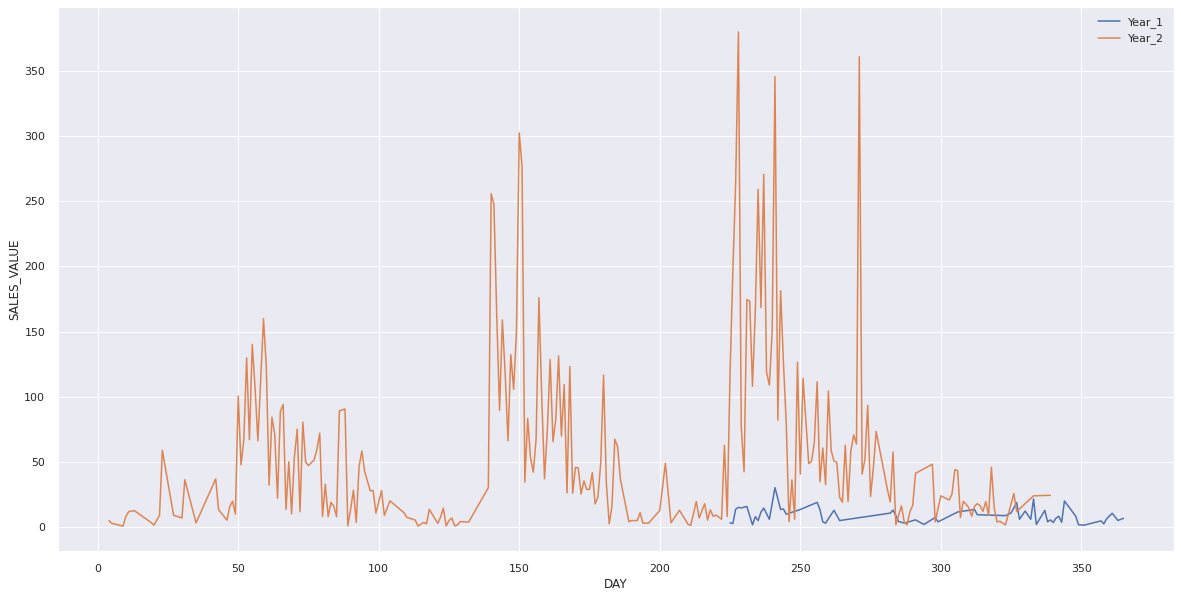

In [ ]:
#FILTER DATA TAHUNAN
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x = "DAY", y = "SALES_VALUE",data=Year_1, markers=True, ci =None, label='Year_1')
sns.lineplot(x = "DAY_min", y = "SALES_VALUE",data=Year_2, markers=True, ci = None,legend=True,label = 'Year_2')
plt.show()

Q1

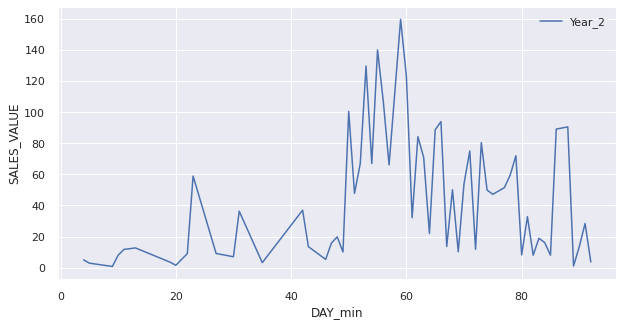

In [ ]:
Year_Sale_Q = merge3[['YEAR','DAY','SALES_VALUE','Q']]
Year_1_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='1') & (Year_Sale_Q['Q']=='1')]
Year_1_Q1 = Year_1_Q1.groupby(Year_1_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='2') & (Year_Sale_Q['Q']=='1')]
Year_2_Q1 = Year_2_Q1.groupby(Year_2_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1['DAY_min']= Year_2_Q1['DAY'] - 365
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x = "DAY", y = "SALES_VALUE",data=Year_1_Q1, markers=True, ci =None, label='Year_1')
sns.lineplot(x = "DAY_min", y = "SALES_VALUE",data=Year_2_Q1, markers=True, ci = None,legend=True,label = 'Year_2')
plt.show()

Q2

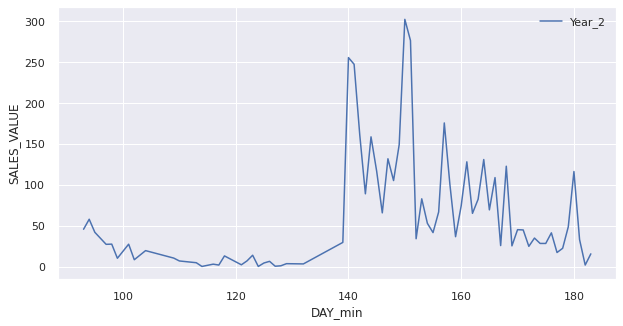

In [ ]:
Year_Sale_Q = merge3[['YEAR','DAY','SALES_VALUE','Q']]
Year_1_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='1') & (Year_Sale_Q['Q']=='2')]
Year_1_Q1 = Year_1_Q1.groupby(Year_1_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='2') & (Year_Sale_Q['Q']=='2')]
Year_2_Q1 = Year_2_Q1.groupby(Year_2_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1['DAY_min']= Year_2_Q1['DAY'] - 365
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x = "DAY", y = "SALES_VALUE",data=Year_1_Q1, markers=True, ci =None, label='Year_1')
sns.lineplot(x = "DAY_min", y = "SALES_VALUE",data=Year_2_Q1, markers=True, ci = None,legend=True,label = 'Year_2')
plt.show()

Q3

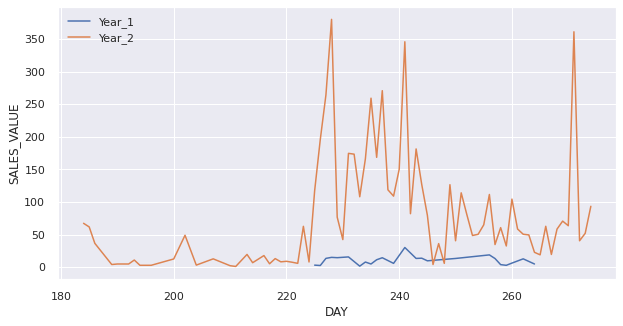

In [ ]:
Year_Sale_Q = merge3[['YEAR','DAY','SALES_VALUE','Q']]
Year_1_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='1') & (Year_Sale_Q['Q']=='3')]
Year_1_Q1 = Year_1_Q1.groupby(Year_1_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='2') & (Year_Sale_Q['Q']=='3')]
Year_2_Q1 = Year_2_Q1.groupby(Year_2_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1['DAY_min']= Year_2_Q1['DAY'] - 365
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x = "DAY", y = "SALES_VALUE",data=Year_1_Q1, markers=True, ci =None, label='Year_1')
sns.lineplot(x = "DAY_min", y = "SALES_VALUE",data=Year_2_Q1, markers=True, ci = None,legend=True,label = 'Year_2')
plt.show()

Q4

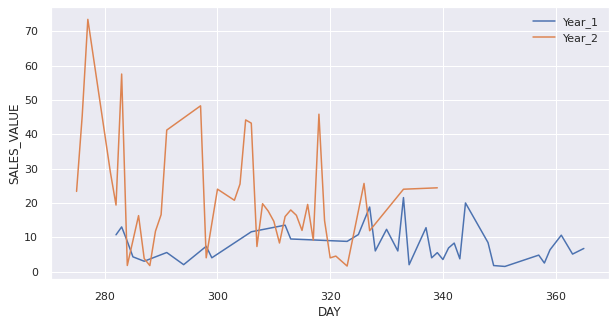

In [ ]:
Year_Sale_Q = merge3[['YEAR','DAY','SALES_VALUE','Q']]
Year_1_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='1') & (Year_Sale_Q['Q']=='4')]
Year_1_Q1 = Year_1_Q1.groupby(Year_1_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1 = Year_Sale_Q[(Year_Sale_Q['YEAR']=='2') & (Year_Sale_Q['Q']=='4')]
Year_2_Q1 = Year_2_Q1.groupby(Year_2_Q1['DAY'])[['SALES_VALUE']].sum().reset_index()
Year_2_Q1['DAY_min']= Year_2_Q1['DAY'] - 365
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x = "DAY", y = "SALES_VALUE",data=Year_1_Q1, markers=True, ci =None, label='Year_1')
sns.lineplot(x = "DAY_min", y = "SALES_VALUE",data=Year_2_Q1, markers=True, ci = None,legend=True,label = 'Year_2')
plt.show()

In [ ]:
#merge3[(merge3['DAY']>630) & (merge3['DAY']<645)]
merge3[(merge3['SALES_VALUE'] < 2.5) & (merge3['Q'] == '4') ]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,CAMPAIGN,START_DAY,END_DAY,day_difference,COUPON_UPC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
92,93,31172786926,282,9194383,1,2.14,384,-1.05,41,Thursday,...,29,281,334,53,51380041313,151,GROCERY,National,FRZN MEAT/MEAT DINNERS,FRZN SS PREMIUM ENTREES/DNRS/N
101,2488,31355786826,294,12171765,1,2.00,324,-0.49,43,Tuesday,...,29,281,334,53,51410010050,159,GROCERY,National,BAKED BREAD/BUNS/ROLLS,PREMIUM BREAD
102,1923,31390907229,298,846767,1,0.25,369,-0.19,43,Saturday,...,29,281,334,53,54300021057,1046,GROCERY,National,DRY MIX DESSERTS,GELATIN
103,1923,31390907229,298,932106,1,0.50,369,-0.19,43,Saturday,...,29,281,334,53,54300021057,1046,GROCERY,National,DRY MIX DESSERTS,GELATIN
105,1923,31390907229,298,10285119,1,2.00,369,-1.99,43,Saturday,...,29,281,334,53,53000012033,584,GROCERY,National,HOT CEREAL,INSTANT OATMEAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,1935,42198343969,704,1068391,1,0.50,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR
4388,1935,42198343969,704,1088308,1,0.50,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR
4389,1935,42198343969,704,15716072,2,1.00,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR
4390,1935,42198343969,704,15716098,2,1.00,367,0.00,101,Saturday,...,24,659,719,60,10000085496,1225,GROCERY,National,CAT FOOD,CAN CATFD GOURMET/SUP PREM (GR


In [ ]:
merge4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3534 entries, 0 to 3533
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   household_key        3534 non-null   object 
 1   BASKET_ID            3534 non-null   object 
 2   DAY                  3534 non-null   int64  
 3   PRODUCT_ID           3534 non-null   object 
 4   QUANTITY             3534 non-null   int64  
 5   SALES_VALUE          3534 non-null   float64
 6   STORE_ID             3534 non-null   object 
 7   RETAIL_DISC          3534 non-null   float64
 8   WEEK_NO              3534 non-null   int64  
 9   DAY_NAME             3534 non-null   object 
 10  YEAR                 3534 non-null   object 
 11  Q                    3534 non-null   object 
 12  COUPON               3534 non-null   float64
 13  DESCRIPTION          3534 non-null   object 
 14  CAMPAIGN             3534 non-null   object 
 15  START_DAY            3534 non-null   i

##Analisis penjualan tahun pertama dan kedua terkait penggunaan kupon

In [ ]:
merge4

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,DAY_NAME,...,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_NUM,ADULT_NUM
0,2280,30202600975,225,1139915,1,3.24,438,-0.30,33,Wednesday,...,National,FROZEN PIZZA,SNACKS/APPETIZERS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
1,2280,30627996067,241,12456474,1,2.50,438,-0.69,35,Friday,...,National,CANDY - PACKAGED,CANDY BAGS-CHOCOCLATE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
2,2280,31804141130,323,824796,1,2.99,438,-0.50,47,Wednesday,...,National,COFFEE,GROUND COFFEE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
3,2280,31804141130,323,8181177,1,5.79,438,0.00,47,Wednesday,...,National,ORAL HYGIENE PRODUCTS,MOUTHWASH RINSES AND SPRAYS,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
4,2280,33095146510,413,1075214,1,6.49,438,-2.50,60,Tuesday,...,National,BATH TISSUES,TOILET TISSUE,35-44,< 50K,Homeowner,2 Adults Kids,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,400,41917741301,683,894426,1,1.54,388,-0.20,98,Saturday,...,National,BAG SNACKS,PRETZELS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3530,400,41917741301,683,5568729,2,6.38,388,-0.60,98,Saturday,...,National,BAG SNACKS,TORTILLA/NACHO CHIPS,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3531,400,41917741301,683,6463907,1,4.99,388,-0.49,98,Saturday,...,National,FROZEN PIZZA,PIZZA/PREMIUM,35-44,150-199K,Homeowner,2 Adults Kids,3,1,2
3532,400,41917741301,683,15926944,1,2.69,388,-0.30,98,Saturday,...,National,BAG SNACKS,DIPS (NON-REFRIGERATED),35-44,150-199K,Homeowner,2 Adults Kids,3,1,2


In [ ]:
SALE_DAY_2 = merge4.groupby(['PRODUCT_ID','day_difference'])['QUANTITY','SALES_VALUE'].sum().sort_values(by ='QUANTITY',ascending=False).reset_index()
SALE_DAY_2 = SALE_DAY_2.groupby(['PRODUCT_ID'])['day_difference','QUANTITY','SALES_VALUE'].sum().reset_index().sort_values(by ='day_difference',ascending=False)
#SALE_DAY = SALE_DAY.groupby(['PRODUCT_ID'])['day_difference','QUANTITY','SALES_VALUE'].sum().reset_index()
SALE_DAY_2['QUANTITY_DAY'] = SALE_DAY_2['QUANTITY']/SALE_DAY_2['day_difference']
SALE_DAY_2['SALES_DAY'] = SALE_DAY_2['SALES_VALUE']/SALE_DAY_2['day_difference']
SALE_DAY_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,PRODUCT_ID,day_difference,QUANTITY,SALES_VALUE,QUANTITY_DAY,SALES_DAY
2212,999104,220,14,35.50,0.063636,0.161364
1362,840361,182,11,9.54,0.060440,0.052418
1228,819063,182,4,5.26,0.021978,0.028901
282,1047393,182,8,7.99,0.043956,0.043901
2109,981760,182,18,16.30,0.098901,0.089560
...,...,...,...,...,...,...
1343,837367,32,1,4.99,0.031250,0.155938
721,12263364,32,1,1.99,0.031250,0.062187
1569,884120,32,1,4.99,0.031250,0.155938
602,1119194,32,2,6.68,0.062500,0.208750


In [ ]:
SALE_DAY_2['PRODUCT_ID'].nunique()

2220

In [ ]:
SALE_DAY_2[SALE_DAY_2['PRODUCT_ID']=='1082185']

,PRODUCT_ID,day_difference,QUANTITY,SALES_VALUE,QUANTITY_DAY,SALES_DAY
441,1082185,102,48,51.02,0.470588,0.500196


In [ ]:
SALE_DAY = merge4.groupby(['PRODUCT_ID','DAY'])['QUANTITY','SALES_VALUE'].sum().sort_values(by ='QUANTITY',ascending=False).reset_index()
#SALE_DAY = SALE_DAY.groupby(['PRODUCT_ID'])['day_difference','QUANTITY','SALES_VALUE'].sum()
#SALE_DAY['QUANTITY_DAY'] = SALE_DAY['QUANTITY']/SALE_DAY['day_difference']
#SALE_DAY['SALES_DAY'] = SALE_DAY['SALES_VALUE']/SALE_DAY['day_difference']
#SALE_DAY_AVG = SALE_DAY.groupby(['PRODUCT_ID'])['QUANTITY','SALES_VALUE'].mean().sort_values(by ='QUANTITY',ascending=False).reset_index()
SALE_DAY = SALE_DAY.reset_index()
SALE_DAY_AVG = SALE_DAY.groupby(['PRODUCT_ID'])['QUANTITY','SALES_VALUE'].mean().sort_values(by ='QUANTITY',ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


In [ ]:
SALE_DAY_NC = merge_nc.groupby(['PRODUCT_ID','DAY'])['QUANTITY','SALES_VALUE'].sum().sort_values(by ='QUANTITY',ascending=False).reset_index()
SALE_DAY_AVG_NC = SALE_DAY_NC.groupby(['PRODUCT_ID'])['QUANTITY','SALES_VALUE'].mean().sort_values(by ='QUANTITY',ascending=False).reset_index()
SALE_DAY_AVG_NC

NameError: ignored

In [ ]:
SALE_DAY_AVG = SALE_DAY_AVG.rename({'QUANTITY': 'QUANTITY_WC', 'SALES_VALUE': 'SALES_VALUE_WC'}, axis='columns')
SALE_DAY_AVG_NC = SALE_DAY_AVG_NC.rename({'QUANTITY': 'QUANTITY_NC', 'SALES_VALUE': 'SALES_VALUE_NC'}, axis='columns')
SALE_DAY_VS = SALE_DAY_AVG.merge(SALE_DAY_AVG_NC, how = 'inner', on = 'PRODUCT_ID').sort_values(by='QUANTITY_NC',ascending=False)
SALE_DAY_VS

In [ ]:
SALE_DAY_VS = SALE_DAY_VS.merge(merge4, how ='left', on ='PRODUCT_ID')
SALE_DAY_VS = SALE_DAY_VS[['PRODUCT_ID','DEPARTMENT','QUANTITY_WC','SALES_VALUE_WC','QUANTITY_NC',	'SALES_VALUE_NC']]
SALE_DAY_VS = SALE_DAY_VS.groupby(['DEPARTMENT'])['QUANTITY_WC',	'SALES_VALUE_WC',	'QUANTITY_NC',	'SALES_VALUE_NC'].mean().reset_index()
SALE_DAY_VS

In [ ]:
SALE_DAY_VS_2 = SALE_DAY_VS.set_index('DEPARTMENT', inplace=False)

In [ ]:
fig = plt.figure() # Canvasnya
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(1, 1, 1)
ax3 = fig.add_subplot(1, 1, 1)
ax4 = fig.add_subplot(1, 1, 1)

ax1.plot(SALE_DAY_VS_2['QUANTITY_WC'],'g')
ax2.plot(SALE_DAY_VS_2['SALES_VALUE_WC'],'b')
ax3.plot(SALE_DAY_VS_2['QUANTITY_NC'],'y')
ax4.plot(SALE_DAY_VS_2['SALES_VALUE_NC'],'r')

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x = "DEPARTMENT", y = "SALES_VALUE_WC",data=SALE_DAY_VS, markers=True, ci =None, label='Pake_Coupon')
sns.lineplot(x = "DEPARTMENT", y = "SALES_VALUE_NC",data=SALE_DAY_VS, markers=True, ci = None,legend=True,label = 'No_Coupon')
plt.show()

In [ ]:
SALE_DAY_WC = SALE_DAY_2[['PRODUCT_ID','day_difference','QUANTITY_DAY','SALES_DAY']]


In [ ]:
merge3['DAY'].max()

In [ ]:
SALE_DAY_NC.nunique()

In [ ]:
SALE_DAY_NC_ALL = SALE_DAY_NC.groupby(['PRODUCT_ID'])['QUANTITY','SALES_VALUE'].sum().reset_index()
SALE_DAY_VS_ALL = SALE_DAY_WC.merge(SALE_DAY_NC_ALL, how = 'inner', on='PRODUCT_ID')
SALE_DAY_VS_ALL['DAY_NO_CP'] = 711 - SALE_DAY_VS_ALL['day_difference']
SALE_DAY_VS_ALL['QUANTITY_NC_DAY'] = SALE_DAY_VS_ALL['QUANTITY']/SALE_DAY_VS_ALL['DAY_NO_CP']
SALE_DAY_VS_ALL['SALES_NC_DAY'] = SALE_DAY_VS_ALL['SALES_VALUE']/SALE_DAY_VS_ALL['DAY_NO_CP']
SALE_DAY_VS_ALL = SALE_DAY_VS_ALL[['PRODUCT_ID','QUANTITY_DAY','SALES_DAY','QUANTITY_NC_DAY','SALES_NC_DAY']].sort_values(by='QUANTITY_DAY',ascending=False)

SALE_DAY_VS_ALL.mean()

##analisis hubungan sales value dan income user

In [ ]:
sales_income = merge4.groupby(merge4['INCOME_DESC'])['SALES_VALUE'].mean().reset_index()
sales_income

,INCOME_DESC,SALES_VALUE
0,100-149K,3.435759
1,150-199K,2.955537
2,50-99K,3.168378
3,< 50K,3.218784
4,> 200K,4.232258


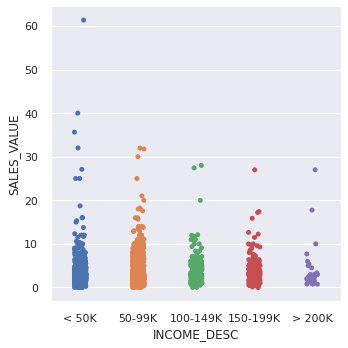

In [ ]:
sns.catplot(x="INCOME_DESC", y="SALES_VALUE",data=merge4);

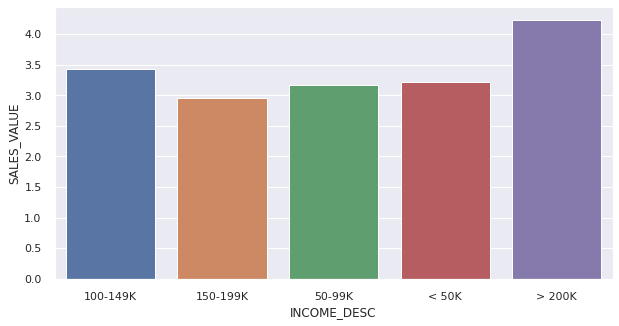

In [ ]:
sns.barplot(x="INCOME_DESC", y="SALES_VALUE",data=sales_income)

##Analisa hubungan produk dengan household desc (ada tidaknya anak)

In [ ]:
merge4.info()

In [ ]:
merge4['KID_NUM'].unique()

In [ ]:
#tidak ada anak
no_kid = merge4[merge4['KID_NUM']=='0']
pro = no_kid.groupby(no_kid['PRODUCT_ID'])['PRODUCT_ID'].count().sort_values(ascending=False)
pro = pd.DataFrame(pro)
pro.rename({'PRODUCT_ID': 'TOTAL'}, axis=1, inplace=True)
pro = pro.reset_index()
prod_no_kid = pro.merge(product, how = 'left', on='PRODUCT_ID')

In [ ]:
prod_no_kid = prod_no_kid[['PRODUCT_ID', 'TOTAL','DEPARTMENT',	'BRAND',	'COMMODITY_DESC',	'SUB_COMMODITY_DESC']]
prod_no_kid.head(15)

In [ ]:
#anak 1
no_kid = merge4[merge4['KID_NUM']=='1']
pro = no_kid['PRODUCT_ID'].groupby(no_kid['PRODUCT_ID']).count().sort_values(ascending=False)
pro = pd.DataFrame(pro)
pro.rename({'PRODUCT_ID': 'TOTAL'}, axis=1, inplace=True)
pro = pro.reset_index()
prod_1_kid = pro.merge(product, how = 'left', on='PRODUCT_ID')

In [ ]:
prod_1_kid = prod_1_kid[['PRODUCT_ID', 'TOTAL','DEPARTMENT',	'BRAND',	'COMMODITY_DESC',	'SUB_COMMODITY_DESC']]
prod_1_kid.head(15)

In [ ]:
#anak 2
no_kid = merge4[merge4['KID_NUM']=='2']
pro = no_kid['PRODUCT_ID'].groupby(no_kid['PRODUCT_ID']).count().sort_values(ascending=False)
pro = pd.DataFrame(pro)
pro.rename({'PRODUCT_ID': 'TOTAL'}, axis=1, inplace=True)
pro = pro.reset_index()
prod_2_kid = pro.merge(product, how = 'left', on='PRODUCT_ID')
prod_2_kid = prod_2_kid[['PRODUCT_ID', 'TOTAL','DEPARTMENT',	'BRAND',	'COMMODITY_DESC',	'SUB_COMMODITY_DESC']]
prod_2_kid.head(15)

In [ ]:
#anak 3+
no_kid = merge4[merge4['KID_NUM']=='3+']
pro = no_kid['PRODUCT_ID'].groupby(no_kid['PRODUCT_ID']).count().sort_values(ascending=False)
pro = pd.DataFrame(pro)
pro.rename({'PRODUCT_ID': 'TOTAL'}, axis=1, inplace=True)
pro = pro.reset_index()
prod_3_kid = pro.merge(product, how = 'left', on='PRODUCT_ID')
prod_3_kid = prod_3_kid[['PRODUCT_ID', 'TOTAL','DEPARTMENT',	'BRAND',	'COMMODITY_DESC',	'SUB_COMMODITY_DESC']]
prod_3_kid.head(15)

TES KORELASI ANTAR VARIABEL YANG SALING MEMPENGARUHI (Tes ANOVA)

#RFM

In [ ]:
Freq = merge4.groupby(merge4['household_key'])['BASKET_ID'].nunique().reset_index()
Freq

,household_key,BASKET_ID
0,1,3
1,101,4
2,1012,1
3,1015,3
4,1024,1
...,...,...
289,968,1
290,979,13
291,982,8
292,983,1


In [ ]:
Mon = merge4.groupby(merge4['household_key'])['SALES_VALUE'].sum().reset_index()
Mon

,household_key,SALES_VALUE
0,1,47.60
1,101,203.35
2,1012,2.14
3,1015,19.73
4,1024,8.66
...,...,...
289,968,2.75
290,979,256.56
291,982,115.36
292,983,5.99


In [ ]:
res = merge4.groupby(merge4['household_key'])['DAY'].max().reset_index()
res['Res'] = 711 - res['DAY']
res

,household_key,DAY,Res
0,1,597,114
1,101,636,75
2,1012,525,186
3,1015,592,119
4,1024,421,290
...,...,...,...
289,968,508,203
290,979,669,42
291,982,639,72
292,983,613,98


In [ ]:
freq_mon = Freq.merge(Mon, how='inner', on='household_key')
rfm = freq_mon.merge(res, how='inner', on ='household_key')
rfm

,household_key,BASKET_ID,SALES_VALUE,DAY,Res
0,1,3,47.60,597,114
1,101,4,203.35,636,75
2,1012,1,2.14,525,186
3,1015,3,19.73,592,119
4,1024,1,8.66,421,290
...,...,...,...,...,...
289,968,1,2.75,508,203
290,979,13,256.56,669,42
291,982,8,115.36,639,72
292,983,1,5.99,613,98


In [ ]:
rfm.rename({'BASKET_ID':'Frequency','SALES_VALUE':'Monetary','Res':'Recency'},axis=1, inplace=True)
rfm

,household_key,Frequency,Monetary,DAY,Recency
0,1,3,47.60,597,114
1,101,4,203.35,636,75
2,1012,1,2.14,525,186
3,1015,3,19.73,592,119
4,1024,1,8.66,421,290
...,...,...,...,...,...
289,968,1,2.75,508,203
290,979,13,256.56,669,42
291,982,8,115.36,639,72
292,983,1,5.99,613,98


In [ ]:
rfm.drop('DAY', axis=1, inplace=True)
rfm

,household_key,Frequency,Monetary,Recency
0,1,3,47.60,114
1,101,4,203.35,75
2,1012,1,2.14,186
3,1015,3,19.73,119
4,1024,1,8.66,290
...,...,...,...,...
289,968,1,2.75,203
290,979,13,256.56,42
291,982,8,115.36,72
292,983,1,5.99,98


In [ ]:
!pip install pandasql

In [ ]:
from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)

In [ ]:
import pandas as pd

class RFM():
  def __init__(self, 
        id_colname:str = 'id', 
        recency_colname:str = 'recency', 
        frequency_colname:str = 'frequency', 
        monetary_colname:str = 'monetary',
        num_cluster:int = 5
    ):
    self.id_colname = id_colname;
    self.recency_colname = recency_colname;
    self.frequency_colname = frequency_colname;
    self.monetary_colname = monetary_colname;
    self.num_cluster = num_cluster;
    #------------------------------------------
    self.dict_rfm_reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven’t spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can’t Lose Them":{
        "Segment":"Can’t Lose Them",
        "Activity":"Made biggest purchases, and often. But haven’t returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don’t lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    };

    _segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
      "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
      "Can’t Lose Them":[155, 154, 144, 214,215,115, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }

    self.df_rfm_segmentation = {};
    for _segment in _segments.keys():
      for _rfm_score in _segments[_segment]:
        self.df_rfm_segmentation[str(_rfm_score)] = self.dict_rfm_reference[_segment];

    #------------------------------------------
    self.df_recency_model = None;
    self.df_frequency_model = None;
    self.df_monetary_model = None;
  
  def __get_rfm_dataset_query__(self)->str:
    return f"""
      select 
        "{self.id_colname}" as id, 
        "{self.recency_colname}" as recency,
        "{self.frequency_colname}" as frequency,
        "{self.monetary_colname}" as monetary 
      from df
    """;

  def extract_dataset(self,df_x):
    #step 0: extract the dataset
    str_query = self.__get_rfm_dataset_query__();
    df_rfm_dataset = pysqldfX(str_query,{"df":df_x});
    return df_rfm_dataset;

  def get_feature_clusters(self, df_rfm_dataset) -> pd.DataFrame:
    df_rfm_dataset['recency_score'] = pd.qcut(
        x=-1*df_rfm_dataset['recency'].values,
        q=self.num_cluster, labels = False
    )+1;
    # df_rfm_dataset['recency_score'] = self.num_cluster - pd.qcut(
    #     x=df_rfm_dataset['recency'].values,
    #     q=self.num_cluster, labels = False
    # );
    df_rfm_dataset['frequency_score'] = pd.qcut(
        x=df_rfm_dataset['frequency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['monetary_score'] = pd.qcut(
        x=df_rfm_dataset['monetary'].values,
        q=self.num_cluster, labels = False
    )+1;
    self.df_recency_model = pysqldfX("""
      select 'recency' as label, recency_score as score, min(recency) as min, max(recency) as max 
      from df group by recency_score order by recency_score desc
    """,{"df":df_rfm_dataset});
    self.df_frequency_model = pysqldfX("""
      select 'frequency' as label, frequency_score as score, min(frequency) as min, max(frequency) as max 
      from df group by frequency_score order by frequency_score asc
    """,{"df":df_rfm_dataset});
    self.df_monetary_model = pysqldfX("""
      select 'monetary' as label, monetary_score as score, min(monetary) as min, max(monetary) as max 
      from df group by monetary_score order by monetary_score asc
    """,{"df":df_rfm_dataset});

  def generate_sql_model(self, df_x):
    label = df_x['label'].unique()[0];
    _cache = [];
    row_counts = df_x.shape[0];
    for i in range(0, row_counts):
      if(i+1<row_counts):
        _cache.append(f"""when {label} <= {df_x['max'][i]} then {df_x['score'][i]}""");
      else:
        _cache.append(f"""when {label} > {df_x['max'][i-1]} then {df_x['score'][i]}""");
    _str = "\n".join(_cache);
    return f"""(case {_str} end) as {label}_score""";

  def score(self, df_x) -> pd.DataFrame:
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    str_query = f"""
      with tmp as (
        select df.*,
          {self.generate_sql_model(self.df_recency_model)},
          {self.generate_sql_model(self.df_frequency_model)},
          {self.generate_sql_model(self.df_monetary_model)}
        from df
      )
      select tmp.*, (recency_score||frequency_score||monetary_score) as rfm_score
      from tmp
    """;
    return pysqldfX(str_query,{"df":df_rfm_dataset});

  def label_samples(self, df_rfm_feature_scored) -> pd.DataFrame:
    label_ref = [];
    for i in range(0,df_rfm_feature_scored.shape[0]):
      label_ref.append(
          self.df_rfm_segmentation[str(df_rfm_feature_scored['rfm_score'][i])]
      );
    return pd.concat([df_rfm_feature_scored, pd.DataFrame(label_ref)],axis=1);

  def fit(self, df_x):
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    #step 1: divide each RFM feature into n buckets
    df_rfm_dataset = self.get_feature_clusters(df_rfm_dataset);

  def transform(self, df_x) -> pd.DataFrame:
    #step 2: score each feature based on model
    df_rfm_feature_scored = self.score(df_x);

    #step 3: map each row with their reference table
    df_rfm_feature_labeled = self.label_samples(df_rfm_feature_scored);

    return df_rfm_feature_labeled;

  def fit_transform(self, df_x: pd.DataFrame) -> pd.DataFrame :
    self.fit(df_x);
    return self.transform(df_x);

In [ ]:
rfm_1 = RFM(
    id_colname ='household_key',
    recency_colname = 'Recency', 
    frequency_colname = 'Frequency', 
    monetary_colname = 'Monetary',
)

rfm_1.fit(RFM)

In [ ]:
rfm_1.df_recency_model